# Important Library Imports

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset
import math
from torchvision.utils import make_grid
import time
import pickle

# Load Loss and Validation Accuracy

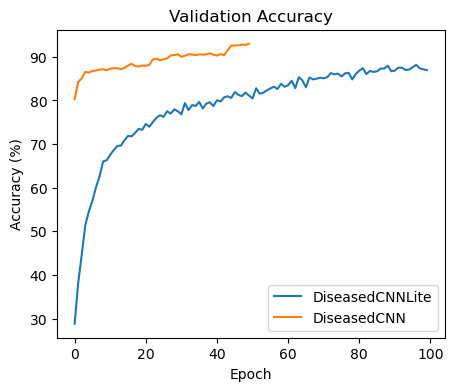

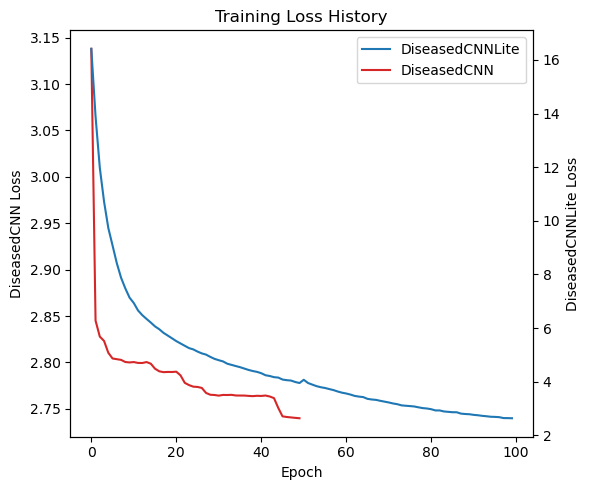

In [49]:
file_path = "finalmodelinfo/StudentModel/StudentModel_training_info.pickle"
student_loss = []
student_val = []
with open(file_path, "rb") as file:
        loaded = pickle.load(file)
        student_loss = loaded["epoch_loss"]
        student_val = loaded["validation_acc"]

file_path = "finalmodelinfo/DiseasedCNN/DiseasedCNN_training_info.pickle"
teacher_loss = []
teacher_val = []
with open(file_path, "rb") as file:
        loaded = pickle.load(file)
        teacher_loss = loaded["epoch_loss"]
        teacher_val = loaded["validation_acc"]


plt.figure(figsize=(5, 4))
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(student_val, label="DiseasedCNNLite")
plt.plot(teacher_val, label="DiseasedCNN")
plt.legend()
plt.savefig("finalmodelinfo/StudentTeacher_Val_Acc")
plt.show()

# plt.title("Training Loss History")
# plt.xlabel("Epoch")
# plt.ylabel("Average Loss")
# plt.plot(student_loss, label="Student")
# plt.plot(teacher_loss, label="Teacher")
# plt.legend()
# plt.show()


fig, ax1 = plt.subplots(figsize=(6, 5))

# Second y-axis for teacher
ax2 = ax1.twinx()  # shares the same x-axis
# First y-axis for student
color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax2.set_ylabel('DiseasedCNNLite Loss')
student_line = ax2.plot(student_loss, color=color, label="DiseasedCNNLite")[0]
ax2.tick_params(axis='y')

color = 'tab:red'
ax1.set_ylabel('DiseasedCNN Loss')
teacher_line = ax1.plot(teacher_loss, color=color, label="DiseasedCNN")[0]
ax1.tick_params(axis='y')

plt.title("Training Loss History")
fig.tight_layout()
lines = [student_line, teacher_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')
plt.savefig("finalmodelinfo/StudentTeacher_Train_Loss")
plt.show()


# Load Models

AssertionError: Torch not compiled with CUDA enabled

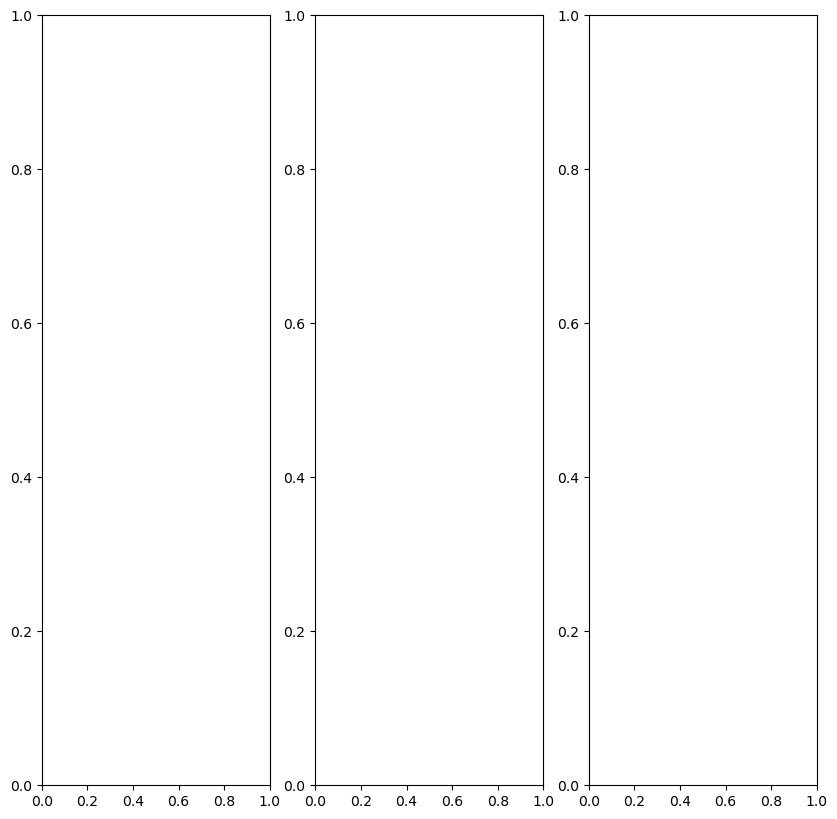

In [ ]:
model = torch.load("finalmodelinfo/DiseasedCNN/DiseasedCNN.pth")

LABELS = ["Apple Scab", "Apple Black Rot", "Apple Cedar Rust", "Apple Healthy", "Blueberry Healthy", "Cherry Healthy", "Cherry Powdery Mildew", "Corn Cercospora Leaf Spot", "Corn Common Rust", "Corn Healthy", "Corn Northern Leaf Blight", "Grape Black Rot", "Grape Black Measles", "Grape Healthy", "Grape Isariopsis Leaf Spot", "Orange Haunglonbing",
          "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot", "Bell Pepper Healthy", "Potato Early Blight", "Potato Healthy", "Potato Late Blight", "Raspberry Healthy", "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Healthy", "Strawberry Leaf Scorch", "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Healthy",
          "Tomato Late Blight", "Tomato Leaf Mold", "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Mosaic Virus", "Tomato Yellow Leaf Curl Virus"]

data = ImageFolder(root="PlantVillage/Testing", transform=transforms.ToTensor())

# Define data loader
dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=0)
data_iter = iter(dataloader) 
images, labels = next(data_iter)  # Ignore labels, we only need images

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
y_pred = model(images).argmax(dim=1)

for i in range(3):
    image = images[i].permute(1, 2, 0)
    axes[i].imshow(image)
    axes[i].set_title("Predicted: " + LABELS[y_pred[i]] + "\nGT: " + LABELS[labels[i]])

# plt.imshow(augmented_images[0])
plt.show()